# Statistics for Cyclone Test Month

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os

In [2]:
# Read in monthly data
data_ERA5 = pd.read_csv('/scratch/nf33/ad1803/hk25-AusCyclones/ETC_workfolder/ETCs_Climatology_ERA5/Data/stitchNodes/stitchNodes.csv')
data_HRes = pd.read_csv('/scratch/nf33/ad1803/hk25-AusCyclones/ETC_workfolder/ETCs_Climatology_HRes/ETCs_hres_clim/stitchNodes/stitchNodes.csv')

# Stats for Duration
#### ERA 5 Analysis

        track_id  duration_hours_ERA
0              0                 180
1              1                  18
2              2                  66
3              3                  66
4              4                  66
...          ...                 ...
133062    133062                  36
133063    133063                  42
133064    133064                  30
133065    133065                  30
133066    133066                  30

[133067 rows x 2 columns]
TrackID with max duration: 45000, Duration: 1428 hours


<function matplotlib.pyplot.show(close=None, block=None)>

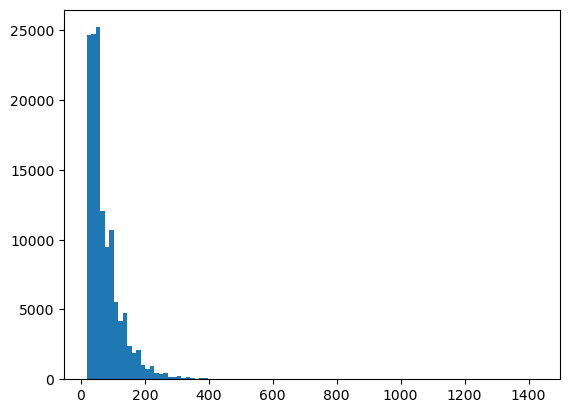

In [27]:
#Group by track ID to give duration at output 

# Create a DataFrame
df = pd.DataFrame(data_ERA5)

# Count the number of rows per cyclone (each row = 6 hours)
track_counts = df['track_id'].value_counts().sort_index()

# Calculate duration in hours
duration_hours_ERA = track_counts * 6

# Convert to DataFrame
duration_df = duration_hours_ERA.reset_index()
duration_df.columns = ['track_id', 'duration_hours_ERA']

print(duration_df)

# Find max duration and trackID
max_row = duration_df.loc[duration_df['duration_hours_ERA'].idxmax()]
print(f"TrackID with max duration: {max_row['track_id']}, Duration: {max_row['duration_hours_ERA']} hours")

plt.hist(duration_hours_ERA, bins = 100)
plt.show

     track_id  duration_hours_HRes
0           0                   42
1           1                   30
2           2                  108
3           3                  102
4           4                   60
..        ...                  ...
248       248                   30
249       249                   24
250       250                   24
251       251                   36
252       252                   30

[253 rows x 2 columns]
TrackID with max duration: 58, Duration: 252 hours


<function matplotlib.pyplot.show(close=None, block=None)>

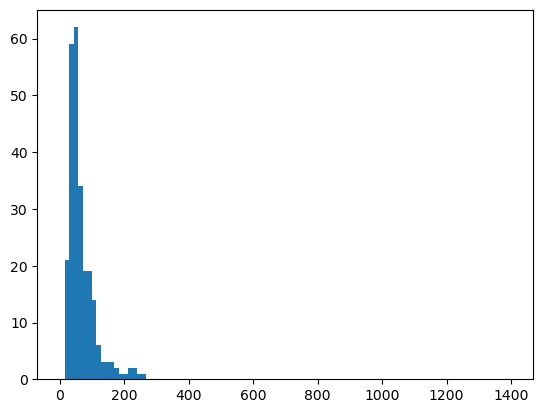

In [24]:
#Group by track ID to give duration at output 

# Create a DataFrame
df = pd.DataFrame(data_HRes)

# Count the number of rows per cyclone (each row = 6 hours)
track_counts = df['track_id'].value_counts().sort_index()

# Calculate duration in hours
duration_hours = track_counts * 6

# Convert to DataFrame
duration_df_Hres = duration_hours.reset_index()
duration_df_Hres.columns = ['track_id', 'duration_hours_HRes']

print(duration_df)

# Find max duration and trackID
max_row = duration_df.loc[duration_df['duration_hours_HRes'].idxmax()]
print(f"TrackID with max duration: {max_row['track_id']}, Duration: {max_row['duration_hours_HRes']} hours")

plt.hist(duration_hours_HRes, bins = 100, range = (0, 1400))
plt.show

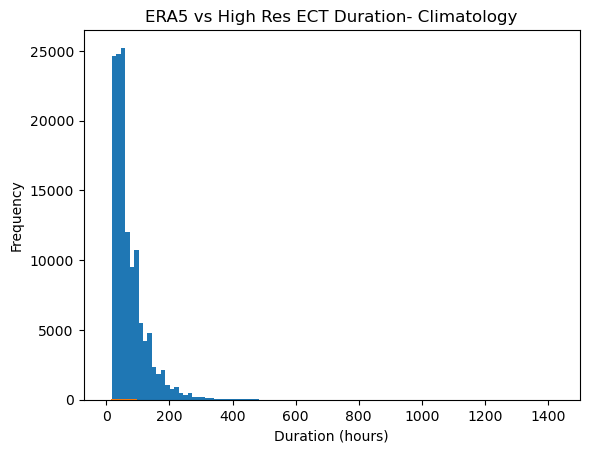

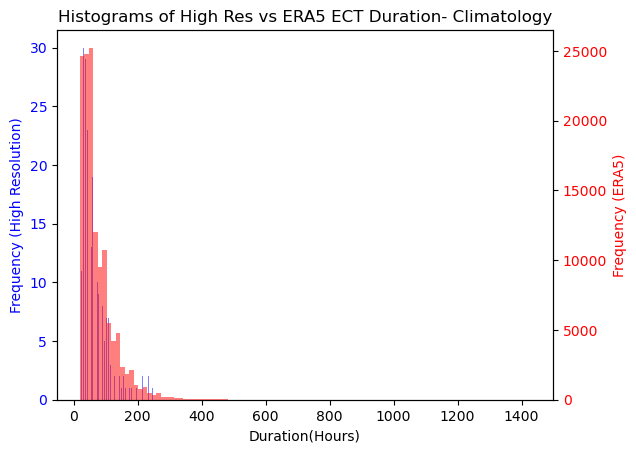

In [31]:
# Histogram comparing ETC duration of ERA5 and High Res
plt.hist(duration_hours_ERA, bins = 100) 
plt.hist(duration_hours_HRes, bins = 100, range = (0, 1400))
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('ERA5 vs High Res ECT Duration- Climatology')
plt.show()


#Trying to set up the histograms on two different y-axis for comparison

fig, ax1 = plt.subplots()

# First histogram on the left y-axis
ax1.hist(duration_hours_HRes, bins=100, alpha=0.5, label='Min MSL', color='blue')
ax1.set_xlabel('Duration(Hours)')
ax1.set_ylabel('Frequency (High Resolution)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Second histogram on the right y-axis
ax2.hist(duration_hours_ERA, bins=100, alpha= 0.5, label='ERA5 Frequency', color='red')
ax2.set_ylabel('Frequency (ERA5)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Histograms of High Res vs ERA5 ECT Duration- Climatology')
plt.show()

# Stats for latitude

In [34]:
# Create DataFrame
df_lat_ERA = pd.DataFrame(data_ERA5)
df_lat_HRes = pd.DataFrame(data_HRes)


Index(['track_id', ' year', ' month', ' day', ' hour', ' i', ' j', ' lon',
       ' lat', ' msl', ' zs'],
      dtype='object')


In [37]:
# Group by trackID and calculate average latitude for ERA5 Data 
avg_lat_df_ERA = df_lat_ERA.groupby('track_id')[' lat'].mean().reset_index()
avg_lat_df_ERA.columns = ['track_id', 'avg_lat']

# Group by trackID and calculate average latitude for High Res
avg_lat_df_HRes = df_lat_HRes.groupby('track_id')[' lat'].mean().reset_index()
avg_lat_df_HRes.columns = ['track_id', 'avg_lat']


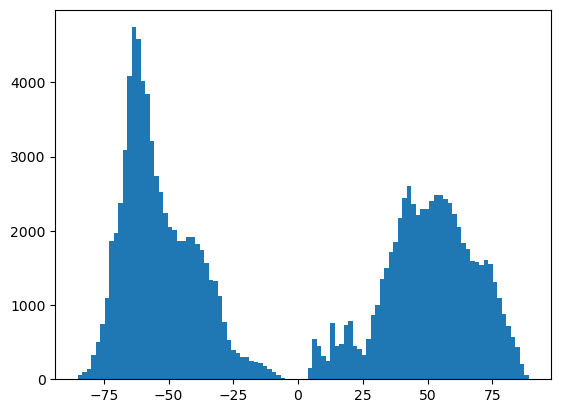

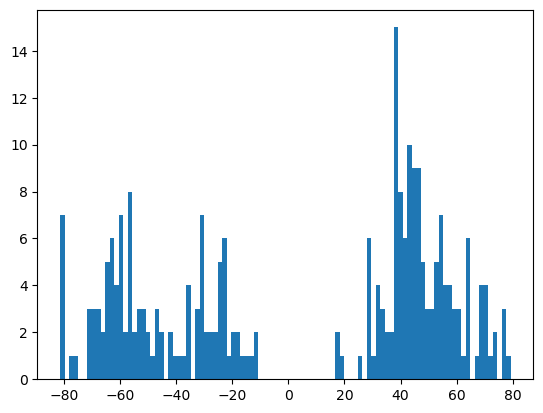

In [43]:
# Histogram of ETC Duration 
plt.hist(avg_lat_df_ERA.avg_lat, bins = 100)
plt.show()

plt.hist(avg_lat_df_HRes.avg_lat, bins = 100)
plt.show()

# Feb Only Stats

In [31]:
# Filter for February (month == 2)
df_feb = df[df[' month'] == 2]

# Duration: count rows per trackID, each row = 6 hours
duration_df = df_feb['track_id'].value_counts().sort_index() * 6
duration_df = duration_df.reset_index()
duration_df.columns = ['track_id', 'duration']

# Average latitude per trackID
avg_lat_df = df_feb.groupby('track_id')[' lat'].mean().reset_index()
avg_lat_df.columns = ['track_id', 'avg_lat']

# Merge both results
feb_df = pd.merge(duration_df, avg_lat_df, on='track_id')

print(result_df)

       track_id  duration_hours    avg_lat
0           141              60 -59.225000
1           198              42 -65.357143
2           205              60 -63.425000
3           206              60  68.175000
4           222              78 -23.711538
...         ...             ...        ...
11032    130531              24 -48.187500
11033    130532              24 -61.187500
11034    130533              12 -55.250000
11035    130534               6  53.000000
11036    130535               6 -56.250000

[11037 rows x 3 columns]


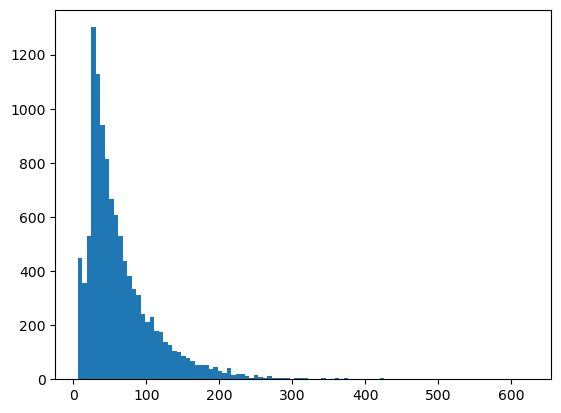

In [32]:
# Histogram of ETC Duration in Feb
plt.hist(feb_df.duration, bins = 100)
plt.show()

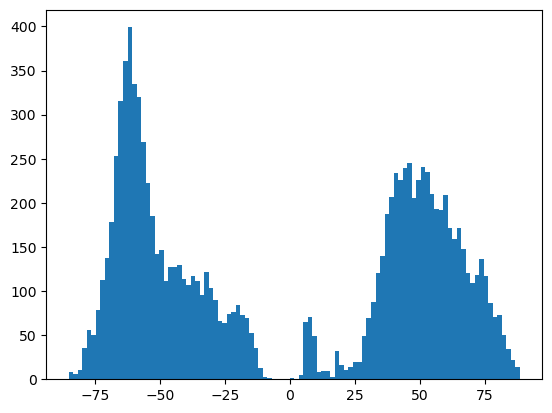

In [33]:
# Histogram of ETC Lat in Feb
plt.hist(feb_df.avg_lat, bins = 100)
plt.show()

#### Depth Statistics
Feb Casestudy ERA 5 climatology

In [ ]:
# Filter for February (month == 2)
df_feb = df[df[' month'] == 2]

# Duration: count rows per trackID, each row = 6 hours
duration_df = df_feb['track_id'].value_counts().sort_index() * 6
duration_df = duration_df.reset_index()
duration_df.columns = ['track_id', 'duration']

# Average latitude per trackID
avg_lat_df = df_feb.groupby('track_id')[' lat'].mean().reset_index()
avg_lat_df.columns = ['track_id', 'avg_lat']

# Minimum Cyclone Depth
min_depth_df = df_feb.groupby('track_id')[' msl'].min().reset_index()

# Average Cyclone Depth
avg_depth_df = df_feb.groupby('track_id')[' msl'].mean().reset_index()

# Merge all results
feb_df = duration_df \
    .merge(avg_lat_df, on='track_id') \
    .merge(min_depth_df, on='track_id') \
    .merge(avg_depth_df, on='track_id')


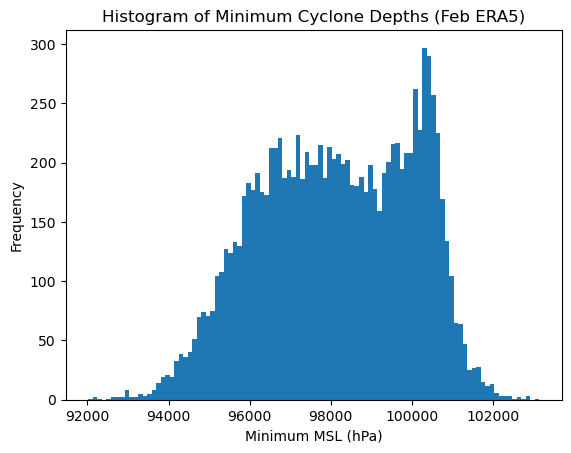

In [55]:
# Histogram of ETC Lat in Feb
plt.hist(feb_df[' msl_x'], bins=100)
plt.xlabel('Minimum MSL (hPa)')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum Cyclone Depths (Feb ERA5)')
plt.show()

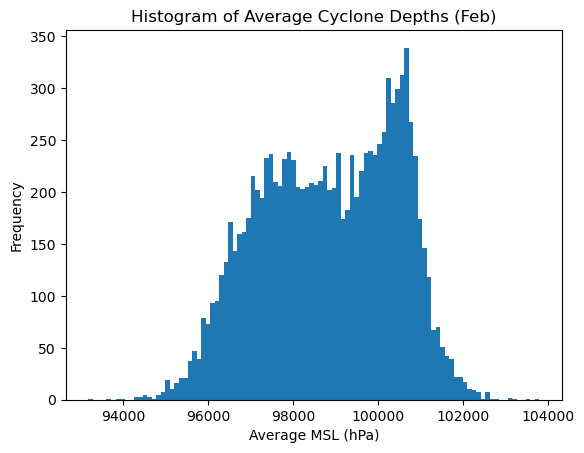

In [53]:
# Histogram of ETC Lat in Feb
plt.hist(feb_df[' msl_y'], bins=100)
plt.xlabel('Average MSL (hPa)')
plt.ylabel('Frequency')
plt.title('Histogram of Average Cyclone Depths (Feb)')
plt.show()

In [ ]:
fig = plot_depth(dstc['number'], 0, 360, -80, 80, np.arange(0, 3, 1), 1, 'Blues', 'TempestExtremes Extratropical cyclone track density [ERA5]')

## Depth ERA5 vs High Res

In [4]:
# Minimum Cyclone Depth
min_depth_df_ERA = data_ERA5.groupby('track_id')[' msl'].min().reset_index()
min_depth_df_HRes = data_HRes.groupby('track_id')[' psl'].min().reset_index()

# Average Cyclone Depth
avg_depth_df_ERA = data_ERA5.groupby('track_id')[' msl'].mean().reset_index()
avg_depth_df_HRes = data_HRes.groupby('track_id')[' psl'].mean().reset_index()

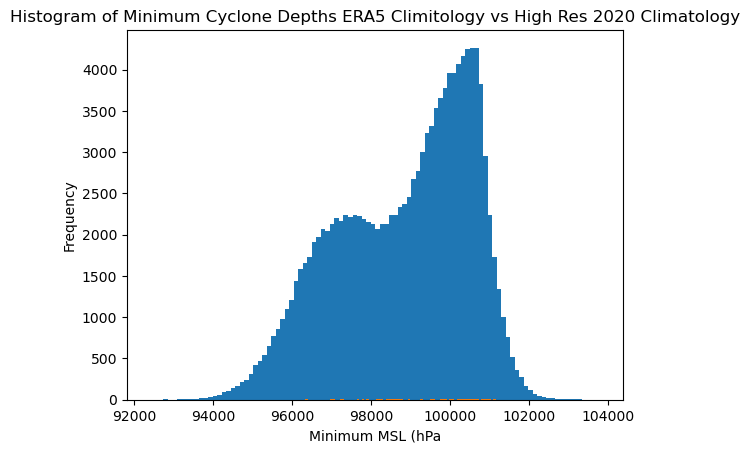

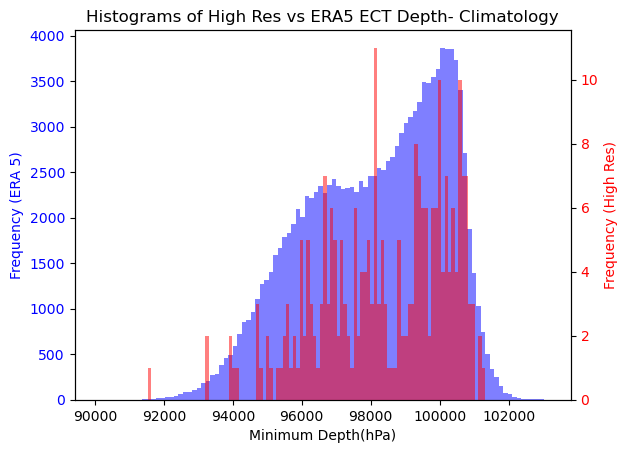

In [7]:
# Histogram of ETC Lat in Feb
plt.hist(avg_depth_df_ERA[' msl'], bins=100)
plt.hist(avg_depth_df_HRes[' psl'], bins=100)
plt.xlabel('Minimum MSL (hPa')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum Cyclone Depths ERA5 Climitology vs High Res 2020 Climatology')
#plt.show()


#Set up the histograms on two different y-axis for comparison

fig, ax1 = plt.subplots()

# First histogram on the left y-axis
ax1.hist(min_depth_df_ERA[' msl'], bins=100, alpha=0.5, label='Min MSL', color='blue')
ax1.set_xlabel('Minimum Depth(hPa)')
ax1.set_ylabel('Frequency (ERA 5)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Second histogram on the right y-axis
ax2.hist(min_depth_df_HRes[' psl'], bins=100, alpha= 0.5, label='ERA5 Frequency', color='red')
ax2.set_ylabel('Frequency (High Res)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Histograms of High Res vs ERA5 ECT Depth- Climatology')
plt.show()